In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
!date

Wed Oct 29 14:20:16 PDT 2025


# Time to figure out what size population we should run with

I have a run with a single draw and many random seeds (each for a 20,000 person population).  I will use that to calculate the MCSE for a dalys averted value, for a single year/sex/age group.

In [2]:
%cd /mnt/team/simulation_science/pub/models/vivarium_csu_alzheimers/results

/mnt/team/simulation_science/pub/models/vivarium_csu_alzheimers/results


In [3]:
dname = 'abie_consistent_model_test/united_states_of_america/2025_10_27_14_30_10/results/'

import os
[x for x in os.listdir(dname) if 'parquet' in x and 'yld' in x]

['ylds.parquet']

In [4]:
def my_load(data_str):
    df = pd.read_parquet(f'{dname}/{data_str}.parquet')
    
    df['location'] = df['artifact_path'].str.split('/').str[-1].str.replace('.hdf', '')
    df['year'] = df['event_year'].astype(int)
    del df['artifact_path']
    del df['input_draw_number']
    del df['event_year']

    return df
df = my_load('ylds')

In [5]:
df

,measure,entity_type,entity,sub_entity,age_group,sex,scenario,input_draw,random_seed,value,location,year
0,ylds,cause,alzheimers_disease_and_other_dementias,alzheimers_blood_based_biomarker_state,25_to_29,Female,baseline,457,3167,0.000000,united_states_of_america,2025
1,ylds,cause,alzheimers_disease_and_other_dementias,alzheimers_mild_cognitive_impairment_state,25_to_29,Female,baseline,457,3167,0.000000,united_states_of_america,2025
2,ylds,cause,alzheimers_disease_and_other_dementias,alzheimers_disease_state,25_to_29,Female,baseline,457,3167,0.000000,united_states_of_america,2025
3,ylds,cause,treatment,waiting_for_treatment,25_to_29,Female,baseline,457,3167,0.000000,united_states_of_america,2025
4,ylds,cause,treatment,full_effect_long,25_to_29,Female,baseline,457,3167,0.000000,united_states_of_america,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
12959995,ylds,cause,treatment,waning_effect_short,95_plus,Male,bbbm_testing_and_treatment,457,3528,0.000000,united_states_of_america,2060
12959996,ylds,cause,treatment,no_effect_after_long,95_plus,Male,bbbm_testing_and_treatment,457,3528,0.000000,united_states_of_america,2060
12959997,ylds,cause,treatment,no_effect_after_short,95_plus,Male,bbbm_testing_and_treatment,457,3528,0.000000,united_states_of_america,2060
12959998,ylds,cause,treatment,no_effect_never_treated,95_plus,Male,bbbm_testing_and_treatment,457,3528,0.000000,united_states_of_america,2060


In [6]:
df.input_draw.value_counts()

input_draw
457    12960000
Name: count, dtype: int64

In [16]:
df.random_seed.nunique()

500

In [7]:
stratified_ylds = df.query('entity == "alzheimers_disease_and_other_dementias"'
        ).groupby(['scenario', 'location', 'year', 'age_group', 'sex', 'random_seed'],
                  observed=True
        ).value.sum().unstack()
stratified_ylds

random_seed                                                                      17    \
scenario                   location                 year age_group sex                  
baseline                   united_states_of_america 2025 25_to_29  Female    0.000000   
                                                                   Male      0.000000   
                                                         30_to_34  Female    0.250843   
                                                                   Male      0.195100   
                                                         35_to_39  Female    0.222971   
...                                                                               ...   
bbbm_testing_and_treatment united_states_of_america 2060 85_to_89  Male    426.862133   
                                                         90_to_94  Female  628.514692   
                                                                   Male    246.637209   
                                                         95_plus   Female  305.715716   
                                                                   Male     81.688001   

random_seed                                                                      28    \
scenario                   location                 year age_group sex                  
baseline                   united_states_of_america 2025 25_to_29  Female    0.000000   
                                                                   Male      0.000000   
                                                         30_to_34  Female    0.195100   
                                                                   Male      0.055743   
                                                         35_to_39  Female    0.041807   
...                                                                               ...   
bbbm_testing_and_treatment united_states_of_america 2060 85_to_89  Male    400.802645   
                                                         90_to_94  Female  646.366405   
                                                                   Male    256.323212   
                                                         95_plus   Female  310.047392   
                                                                   Male     83.319837   

random_seed                                                                      40    \
scenario                   location                 year age_group sex                  
baseline                   united_states_of_america 2025 25_to_29  Female    0.000000   
                                                                   Male      0.000000   
                                                         30_to_34  Female    0.236907   
                                                                   Male      0.013936   
                                                         35_to_39  Female    0.097550   
...                                                                               ...   
bbbm_testing_and_treatment united_states_of_america 2060 85_to_89  Male    419.182620   
                                                         90_to_94  Female  631.758006   
                                                                   Male    256.868551   
                                                         95_plus   Female  290.512369   
                                                                   Male     85.120261   

random_seed                                                                      93    \
scenario                   location                 year age_group sex                  
baseline                   united_states_of_america 2025 25_to_29  Female    0.000000   
                                                                   Male      0.000000   
                                                         30_to_34  Female    0.362329   
                                                                   Male      0.15

In [8]:
stratified_ylds_averted = stratified_ylds.loc['baseline'] - stratified_ylds.loc['bbbm_testing_and_treatment']
stratified_ylds_averted

random_seed                                         17        28        40    \
location                 year age_group sex                                    
united_states_of_america 2025 25_to_29  Female  0.000000  0.000000  0.000000   
                                        Male    0.000000  0.000000  0.000000   
                              30_to_34  Female  0.000000  0.000000  0.000000   
                                        Male    0.000000  0.000000  0.000000   
                              35_to_39  Female  0.000000  0.000000  0.000000   
...                                                  ...       ...       ...   
                         2060 85_to_89  Male    2.115127  3.050604  1.738268   
                              90_to_94  Female -2.161591 -1.598122  2.362732   
                                        Male   -0.172434  0.890040  1.193100   
                              95_plus   Female -1.916890 -0.466234 -1.026229   
                                        Male   -0.599915  0.000000 -0.381362   

random_seed                                         93        99        103   \
location                 year age_group sex                                    
united_states_of_america 2025 25_to_29  Female  0.000000  0.000000  0.000000   
                                        Male    0.000000  0.000000  0.000000   
                              30_to_34  Female  0.000000  0.000000  0.000000   
                                        Male    0.000000  0.000000  0.000000   
                              35_to_39  Female  0.000000  0.000000  0.000000   
...                                                  ...       ...       ...   
                         2060 85_to_89  Male    3.790387  3.197227  2.394436   
                              90_to_94  Female -0.951038 -0.939734  2.279118   
                                        Male    0.945783  1.234907  1.794015   
                              95_plus   Female -0.013936 -1.068036 -0.713287   
                                        Male   -0.641722 -0.013936 -0.381362   

random_seed                                         107       131       241   \
location                 year age_group sex                                    
united_states_of_america 2025 25_to_29  Female  0.000000  0.000000  0.000000   
                                        Male    0.000000  0.000000  0.000000   
                              30_to_34  Female  0.000000  0.000000  0.000000   
                                        Male    0.000000  0.000000  0.000000   
                              35_to_39  Female  0.000000  0.000000  0.000000   
...                                                  ...       ...       ...   
                         2060 85_to_89  Male    5.626799  2.722223  3.183291   
                              90_to_94  Female  0.753306 -0.881359  0.122790   
                                        Male   -0.559108  0.675799  1.421276   
                              95_plus   Female -2.682131 -0.820983 -0.302796   
                                        Male   -0.381362  0.000000  0.121003   

random_seed                                         278   ...      9872  \
location                 year age_group sex               ...             
united_states_of_america 2025 25_to_29  Female  0.000000  ...  0.000000   
                                        Male    0.000000  ...  0.000000   
                              30_to_34  Female  0.000000  ...  0.000000   
                                        Male    0.000000  ...  0.000000   
                              35_to_39  Female  0.000000  ...  0.000000   
...                                                  ...  ...       ...   
                         2060 85_to_89  Male    2.568930  ...  0.844598   
                              90_to_94  Female -1.241056  ... -2.259141   
                                        Male   -0.442417  ...  1.295855   
                              95_plus   Female -1.15

In [9]:
stratified_ylds_averted.std(axis=1).sort_values()

location                  year  age_group  sex   
united_states_of_america  2041  95_plus    Female    0.000000
                          2039  95_plus    Female    0.000000
                                           Male      0.000000
                          2040  25_to_29   Female    0.000000
                                           Male      0.000000
                                                       ...   
                          2051  80_to_84   Female    1.926713
                          2049  80_to_84   Female    1.932463
                          2052  80_to_84   Female    1.942653
                          2053  80_to_84   Female    1.957891
                          2056  80_to_84   Female    2.004930
Length: 1080, dtype: float64

In [10]:
stratified_ylds_averted.mean(axis=1).sort_values()

location                  year  age_group  sex   
united_states_of_america  2060  95_plus    Female    -0.928377
                          2059  95_plus    Female    -0.872205
                          2058  95_plus    Female    -0.804398
                          2057  95_plus    Female    -0.719774
                          2056  95_plus    Female    -0.629421
                                                       ...    
                          2060  80_to_84   Female    10.752743
                          2056  80_to_84   Female    10.753636
                          2055  80_to_84   Female    10.756231
                          2052  80_to_84   Female    10.818709
                          2051  80_to_84   Female    10.879265
Length: 1080, dtype: float64

Text(0.5, 1.0, 'Standard Deviation of YLDs Averted across 500 random seeds\n(for a single input draw, n=20,000)')

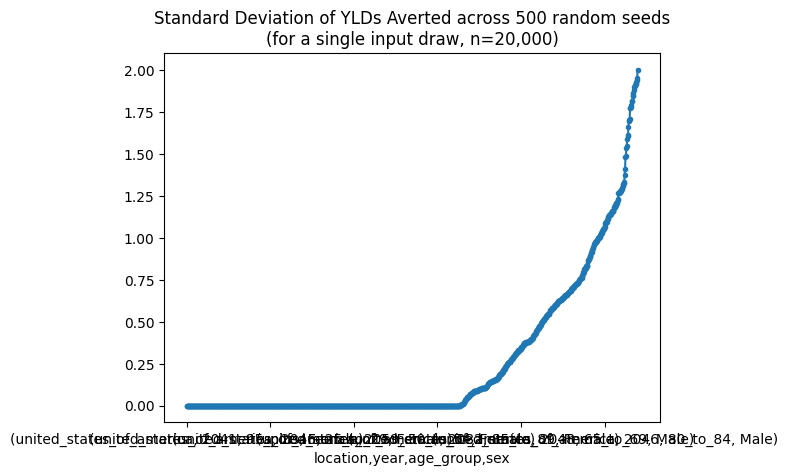

In [17]:
stratified_ylds_averted.std(axis=1).sort_values().plot(marker='.')
plt.title('Standard Deviation of YLDs Averted across 500 random seeds\n(for a single input draw, n=20,000)')

In [18]:
# # just a check; If I group random seeds into groups of 9, then standard deviation should be 3x smaller (e.g. from 0 to .7)

df['grouped_random_seed'] = pd.qcut(df.random_seed, 500)

In [19]:
stratified_ylds_2 = df.query('entity == "alzheimers_disease_and_other_dementias"'
        ).groupby(['scenario', 'location', 'year', 'age_group', 'sex', 'grouped_random_seed', 'random_seed'],
                  observed=True
        ).value.sum()
stratified_ylds_2 = stratified_ylds_2.reset_index().groupby(['scenario', 'location', 'year', 'age_group', 'sex', 'grouped_random_seed'],
                  observed=True
        ).value.mean()
stratified_ylds_2 = stratified_ylds_2.unstack()
stratified_ylds_2

grouped_random_seed                                                        (16.999, 27.978]  \
scenario                   location                 year age_group sex                        
baseline                   united_states_of_america 2025 25_to_29  Female          0.000000   
                                                                   Male            0.000000   
                                                         30_to_34  Female          0.250843   
                                                                   Male            0.195100   
                                                         35_to_39  Female          0.222971   
...                                                                                     ...   
bbbm_testing_and_treatment united_states_of_america 2060 85_to_89  Male          426.862133   
                                                         90_to_94  Female        628.514692   
                                                                   Male          246.637209   
                                                         95_plus   Female        305.715716   
                                                                   Male           81.688001   

grouped_random_seed                                                        (27.978, 39.952]  \
scenario                   location                 year age_group sex                        
baseline                   united_states_of_america 2025 25_to_29  Female          0.000000   
                                                                   Male            0.000000   
                                                         30_to_34  Female          0.195100   
                                                                   Male            0.055743   
                                                         35_to_39  Female          0.041807   
...                                                                                     ...   
bbbm_testing_and_treatment united_states_of_america 2060 85_to_89  Male          400.802645   
                                                         90_to_94  Female        646.366405   
                                                                   Male          256.323212   
                                                         95_plus   Female        310.047392   
                                                                   Male           83.319837   

grouped_random_seed                                                        (39.952, 92.682]  \
scenario                   location                 year age_group sex                        
baseline                   united_states_of_america 2025 25_to_29  Female          0.000000   
                                                                   Male            0.000000   
                                                         30_to_34  Female          0.236907   
                                                                   Male            0.013936   
                                                         35_to_39  Female          0.097550   
...                                                                                     ...   
bbbm_testing_and_treatment united_states_of_america 2060 85_to_89  Male          419.182620   
                                                         90_to_94  Female        631.758006   
                                                                   Male          256.868551   
                                                         95_plus   Female        290.512369   
                                                                   Male           85.120261   

grouped_random_seed                                                        (92.682, 98.952]  \
scenario                   location                 year age_group sex                        
baseline                   united_states_of_america 2025 25_to_29  Female          0.000000   
       

In [20]:
stratified_ylds_averted_2 = stratified_ylds_2.loc['baseline'] - stratified_ylds_2.loc['bbbm_testing_and_treatment']
stratified_ylds_averted_2

grouped_random_seed                             (16.999, 27.978]  \
location                 year age_group sex                        
united_states_of_america 2025 25_to_29  Female          0.000000   
                                        Male            0.000000   
                              30_to_34  Female          0.000000   
                                        Male            0.000000   
                              35_to_39  Female          0.000000   
...                                                          ...   
                         2060 85_to_89  Male            2.115127   
                              90_to_94  Female         -2.161591   
                                        Male           -0.172434   
                              95_plus   Female         -1.916890   
                                        Male           -0.599915   

grouped_random_seed                             (27.978, 39.952]  \
location                 year age_group sex                        
united_states_of_america 2025 25_to_29  Female          0.000000   
                                        Male            0.000000   
                              30_to_34  Female          0.000000   
                                        Male            0.000000   
                              35_to_39  Female          0.000000   
...                                                          ...   
                         2060 85_to_89  Male            3.050604   
                              90_to_94  Female         -1.598122   
                                        Male            0.890040   
                              95_plus   Female         -0.466234   
                                        Male            0.000000   

grouped_random_seed                             (39.952, 92.682]  \
location                 year age_group sex                        
united_states_of_america 2025 25_to_29  Female          0.000000   
                                        Male            0.000000   
                              30_to_34  Female          0.000000   
                                        Male            0.000000   
                              35_to_39  Female          0.000000   
...                                                          ...   
                         2060 85_to_89  Male            1.738268   
                              90_to_94  Female          2.362732   
                                        Male            1.193100   
                              95_plus   Female         -1.026229   
                                        Male           -0.381362   

grouped_random_seed                             (92.682, 98.952]  \
location                 year age_group sex                        
united_states_of_america 2025 25_to_29  Female          0.000000   
                                        Male            0.000000   
                              30_to_34  Female          0.000000   
                                        Male            0.000000   
                              35_to_39  Female          0.000000   
...                                                          ...   
                         2060 85_to_89  Male            3.790387   
                              90_to_94  Female         -0.951038   
                                        Male            0.945783   
                              95_plus   Female         -0.013936   
                                        Male           -0.641722   

grouped_random_seed                             (98.952, 102.96]  \
location                 year age_group sex                        
united_states_of_america 2025 25_to_29  Female          0.000000   
                                        Male            0.000000   
                              30_to_34  Female          0.000000   
                                        Male            0.000000   
                              35_to_39  Female      

Text(0.5, 1.0, 'Standard Deviation of YLDs Averted across 10 random seeds\n(for a single input draw, n=200,000)')

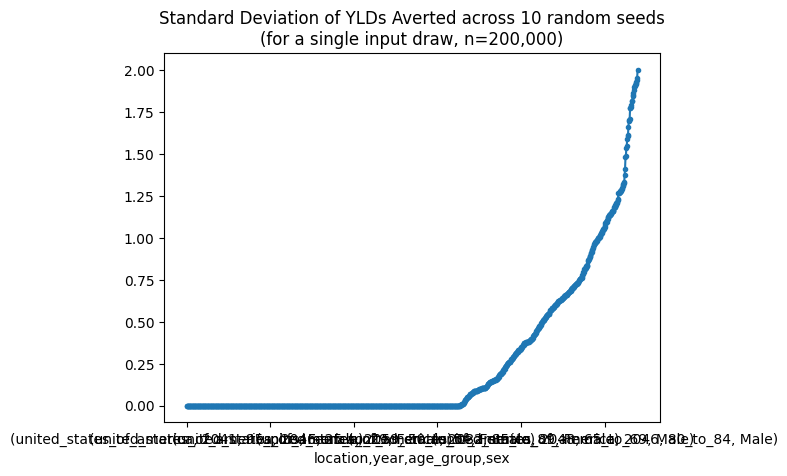

In [21]:
stratified_ylds_averted_2.std(axis=1).sort_values().plot(marker='.')
plt.title('Standard Deviation of YLDs Averted across 10 random seeds\n(for a single input draw, n=200,000)')

(2160, 5)

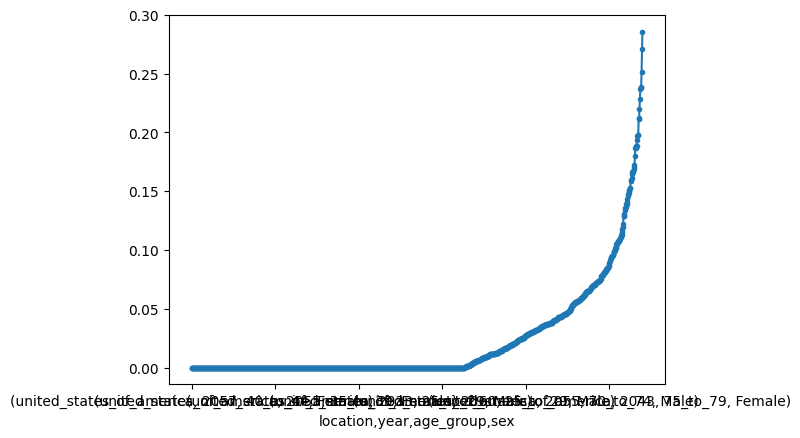

In [31]:
# # just a check; If I group random seeds into groups of 9, then standard deviation should be 3x smaller (e.g. from 0 to .7)

df['grouped_random_seed'] = pd.qcut(df.random_seed, 500//100)

stratified_ylds_2 = df.query('entity == "alzheimers_disease_and_other_dementias"'
        ).groupby(
    ['scenario', 'location', 'year', 'age_group', 'sex', 'grouped_random_seed', 'random_seed'],
                  observed=True
        ).value.sum()
stratified_ylds_2 = stratified_ylds_2.reset_index().groupby(
    ['scenario', 'location', 'year', 'age_group', 'sex', 'grouped_random_seed'],
                  observed=True
        ).value.mean()
stratified_ylds_2 = stratified_ylds_2.unstack()


stratified_ylds_averted_2 = stratified_ylds_2.loc['baseline'] - stratified_ylds_2.loc['bbbm_testing_and_treatment']
stratified_ylds_averted_2.std(axis=1).sort_values().plot(marker='.')
# plt.title('Standard Deviation of YLDs Averted across 5 random seeds\n(for a single input draw, n=400,000)')
stratified_ylds_2.shape

In [32]:
stratified_ylds_2.shape

(2160, 100)